In [40]:
# Aula 14 - Aprendizado não supervisionado
# importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
# Criando a base de dados
cliente_id = np.array([0,1,2,3,4,5,6,7,8,9,10]) # Cria um id para os clientes
valor_compra = np.array([40,150,500,5000,1834,2350,5000,6740,895,3330,4750])

In [42]:
# Juntando as colunas dos dados
dados_compra = np.column_stack((cliente_id,valor_compra))

In [43]:
dados_compra

array([[   0,   40],
       [   1,  150],
       [   2,  500],
       [   3, 5000],
       [   4, 1834],
       [   5, 2350],
       [   6, 5000],
       [   7, 6740],
       [   8,  895],
       [   9, 3330],
       [  10, 4750]])

In [44]:
# Aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=3) # armazena na variavel o modelo KMeans
kmeans.fit(dados_compra) # crio o modelo kmeans

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [45]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_ 
print("SSE",sse)

SSE 6344160.833333333


In [46]:
# Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

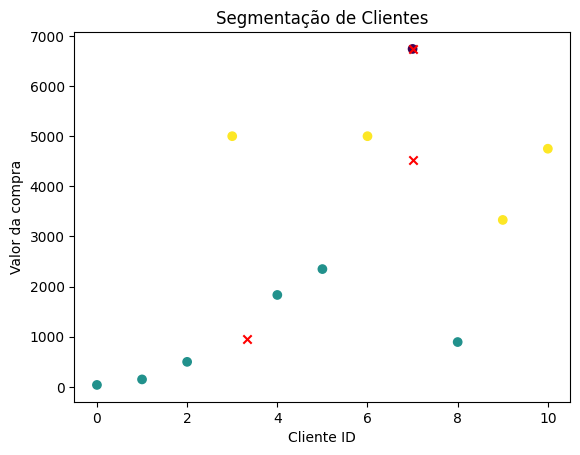

In [47]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados_compra[:,0],dados_compra[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red')
plt.title('Segmentação de Clientes')
plt.xlabel('Cliente ID')
plt.ylabel('Valor da compra')

plt.show()

In [48]:
# importando biblioteca para plotar o gráfico do cotovelo
from sklearn.metrics import silhouette_score

In [49]:
silhouette_score(dados_compra,kmeans.predict(dados_compra))

0.5542656825075212

In [50]:
# Criando uma função para avaliar o número ideal de clusters
def avaliacao(dados_compra):
    inercia =[] # Cria uma lista vazia para receber os parâmetros
    silhueta =[] # Cria uma lista vazia para receber os parametros

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k,random_state=45,n_init='auto')
        kmeans.fit(dados_compra)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k{k}- '+ str(silhouette_score(dados_compra,kmeans.predict(dados_compra))))
    return silhueta,inercia

In [51]:
silhueta,inercia = avaliacao(dados_compra)
silhueta

['k2- 0.6505156057449981', 'k3- 0.6365285647903991', 'k4- 0.6262945821988253']

In [52]:
# analisando a métrica inercia / inertia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do cotovelo para determinação de k')
    plt.show()

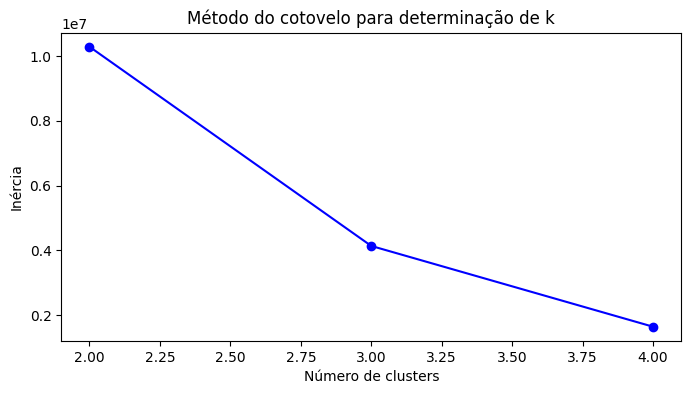

In [53]:
plot_cotovelo(inercia)

In [56]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
def graf_silhoueta(n_clusters,dados_n):
    # Aplica o Kmeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters,random_state=45,n_init='auto')
    clusters_previsoes = kmeans.fit_predict(dados_n)

    # Calcula o silhouette score medio
    silhueta_media = silhouette_score(dados_n,clusters_previsoes)
    print(f'Valor médio para {n_clusters} clusters:{silhueta_media:.3f}')

    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n,clusters_previsoes)

    # Configuração da figura para o gráfico de silhueta
    fig,ax1 = plt.subplots(1,1) # subplot
    fig.set_size_inches(9,7) #tamanho
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(dados_n)+(n_clusters+1)*10])
    y_lower =10
    
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[clusters_previsoes==i]
        ith_cluster_silhueta_amostra.sort()

        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i

        cor = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhueta_amostra,facecolor=cor,edgecolor=cor,
                          alpha = 0.7)
        ax1.text(-0.05, y_lower +0.5* tamanho_cluster_i,str(i))
        y_lower = y_upper +10 # espaço entre os gráficos

        # Linha vertical para a media do silhouette score
    ax1.axvline(x=silhueta_media,color='red',linestyle = '--')
    ax1.set_title(f'Gráfico de silhueta para n {n_clusters} clusters')
    ax1.set_xlabel('Valored de coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    ax1.set_xticks([]) # remove os ticks do eixo y
    ax1.set_xticks([i/10 for i in range(-1,11)])
    plt.show()



Valor médio para 3 clusters:0.637


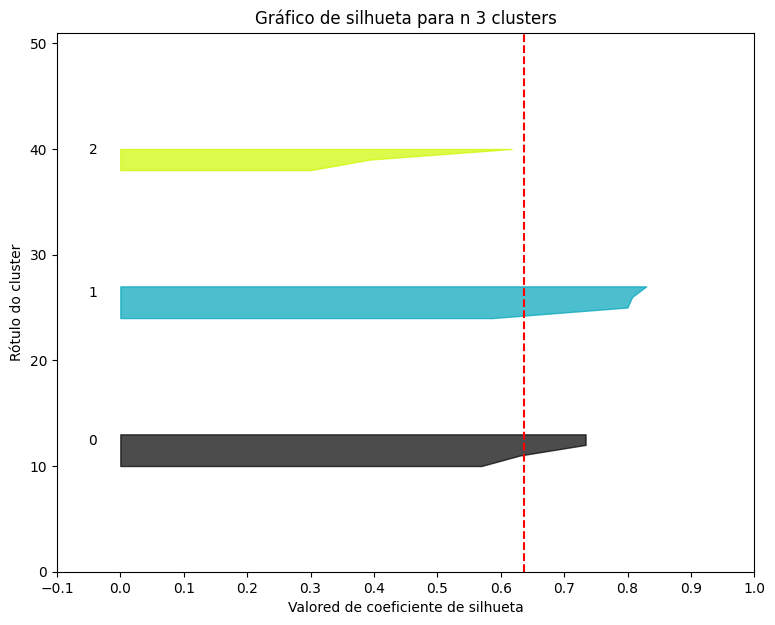

In [57]:
graf_silhoueta(3,dados_compra)